In [23]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product, chain, combinations
from scipy import stats
from IPython.display import display, HTML
%matplotlib inline

def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

def get_file_name(name):
    return name.replace(':', '-')

In [24]:
inputFile = 'data.csv'

plotSize = (10, 10)
plotStyle = 'seaborn-v0_8-whitegrid'
saveFigures = False

In [25]:
df = pd.read_csv('data/' + inputFile)

bsdf = pd.read_csv('data/bs.csv')

In [26]:
df['progress'] = (df['timestamp'] - df['timestamp'].min()) / (df['timestamp'].max() - df['timestamp'].min())

bsdf['progress'] = (bsdf['timestamp'] - bsdf['timestamp'].min()) / (bsdf['timestamp'].max() - bsdf['timestamp'].min())

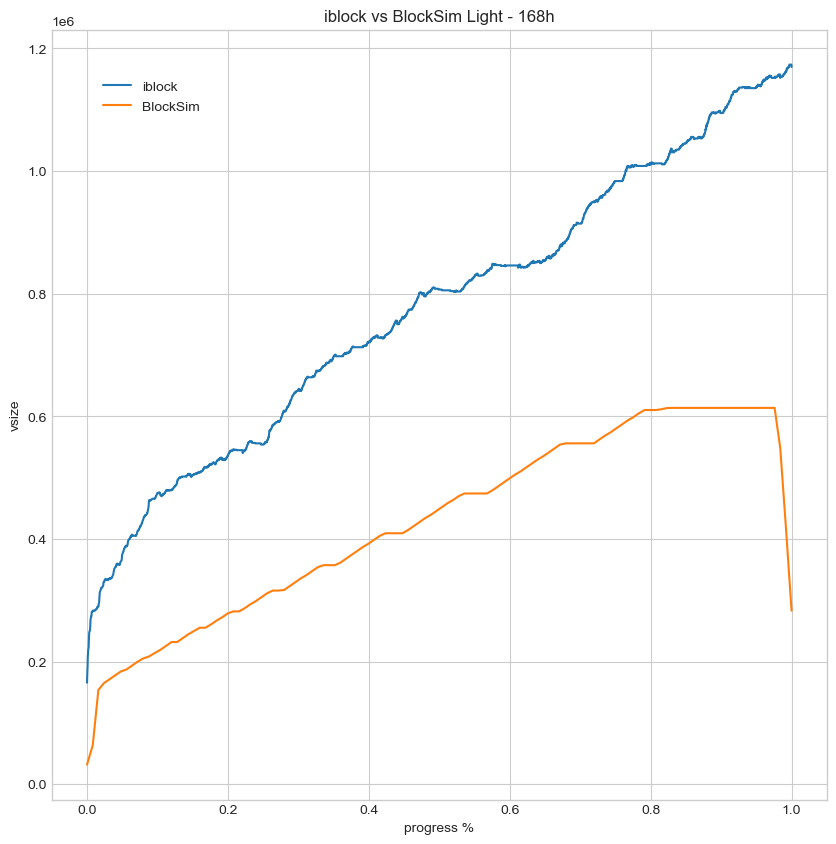

In [38]:
plt.figure(figsize=plotSize)
plt.style.use(plotStyle)
plt.plot(df['progress'], df['vsize'], label='iblock')
plt.plot(bsdf['progress'], bsdf['vsize'], label='BlockSim')
plt.title('iblock vs BlockSim Light - 168h')
plt.ylabel('vsize')
plt.xlabel('progress %')
plt.legend(loc="upper left", bbox_to_anchor=(0.05, 0.95))
plt.show()

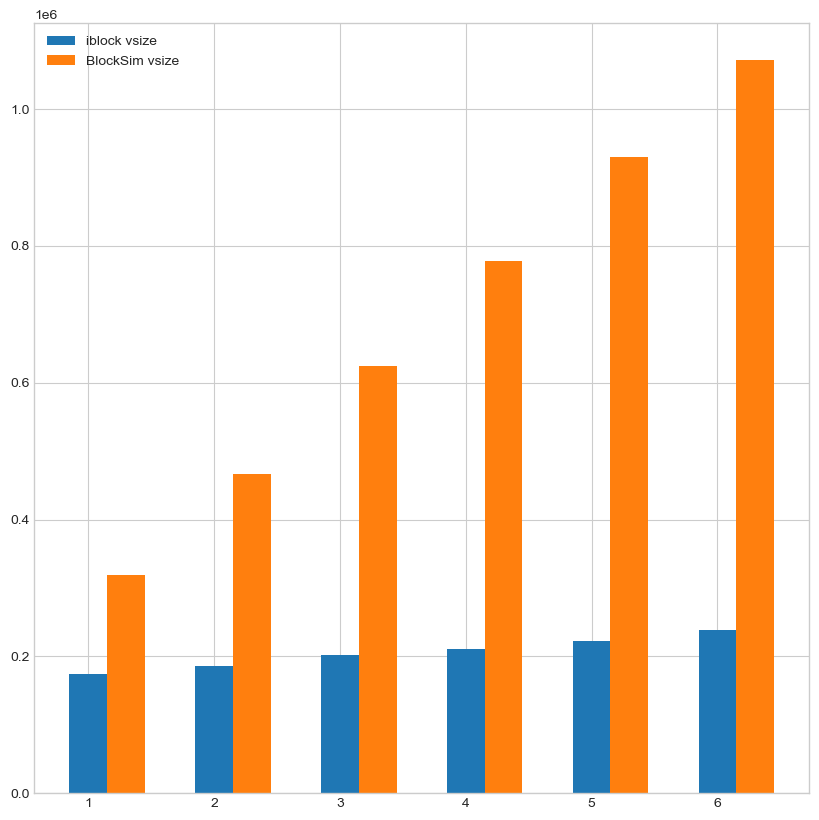

In [64]:
tot = pd.read_csv('data/tot.csv')

barwidth = 0.3

plt.figure(figsize=plotSize)
plt.bar(np.arange(1, 7), tot['ibvsz'], barwidth, label="iblock vsize")
plt.bar(np.arange(1, 7) + barwidth, tot['bsvsz'], barwidth, label="BlockSim vsize")
plt.legend()
plt.show()

# plt.figure(figsize=(10, 100))
# plt.bar(np.arange(1, 7), tot['ibtime'], barwidth, label="iblock time")
# plt.bar(np.arange(1, 7) + barwidth, tot['bstime'], barwidth, label="BlockSim time")
# plt.legend()
# plt.show()